<center> <h1> <span style="color:black"> IA|BE Data Science Certificate - Module 1 - Computer lab 3  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : refinements of GLMs + regularized regression models </h1> </center>

# Agenda
* [Chapter 1 - Import of libraries and datasets](#one)
    + [1.1 Libraries](#one-one)
    + [1.2 Data sets](#one-two)
* [Chapter 2 - Exploratory data analysis](#two)
    + [2.1 Visualizing the distribution of the target variable](#two-one)
    + [2.2 Visualizing the distribution of the features paying attention to 
    risk factors of different types](#two-two)
    + [2.3 Visualizing the empirical distribution of the target as a function of one of the features: a marginal analysis](#two-three)
* [Chapter 3 - More on fitting GLMs with {statsmodels} and {statsmodels.formula.api}](#three)
    + [3.1 A frequency and a severity GLM with only a factor variable](#three-one)
    + [3.2 A GLM with a continuous covariate](#three-two)
    + [3.3 A GLM with a binned continuous covariate](#three-three)
    + [3.4 A frequency GLM with multiple types of features](#three-four)
* [Chapter 4 - Regularized (G)LMs with {statsmodels} and {scikit-learn}](#four)
    + [4.1 A regularized Poisson model with {statsmodels}](#four-one)
    + [4.2 A regularized linear regression model with {scikit-learn}](#four-two)
    + [4.3 Avoiding data leakage with pipelines](#four-three)


# Chapter 1 - Import of libraries and datasets <a name="one"></a>

## 1.1 Libraries <a name="one-one"></a>

In [ ]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.2 Load the data sets <a name="one-two"></a>

### 1.2.1 MTPL data

In [ ]:
mtpl_orig = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/PC_data.txt", delimiter = "\t")

In [ ]:
mtpl_orig.head()

,ID,NCLAIMS,AMOUNT,AVG,EXP,COVERAGE,FUEL,USE,FLEET,SEX,AGEPH,BM,AGEC,POWER,PC,TOWN,LONG,LAT
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


As before, after reading the original data set we start with some data preparation steps: change upper to lower case in the variable names and rename `EXP` to `expo` to refer to the exposure measure.

In [ ]:
mtpl = mtpl_orig
mtpl.columns = mtpl_orig.columns.str.lower()
mtpl = mtpl.rename(columns= {'exp': 'expo'})
mtpl.head()

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [ ]:
mtpl.shape

(163231, 18)

### 1.2.1 Ames housing data

Later on in today's computer lab we demonstrate regularized linear regression on the Ames housing data set. 

In [ ]:
ames_orig = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/ames_python.csv")

In [ ]:
ames_orig.shape

(2930, 82)

In [ ]:
ames_orig

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,2927,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,2928,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,2929,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [ ]:
ames_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2930 non-null   int64  
 1   MS_SubClass         2930 non-null   object 
 2   MS_Zoning           2930 non-null   object 
 3   Lot_Frontage        2930 non-null   int64  
 4   Lot_Area            2930 non-null   int64  
 5   Street              2930 non-null   object 
 6   Alley               2930 non-null   object 
 7   Lot_Shape           2930 non-null   object 
 8   Land_Contour        2930 non-null   object 
 9   Utilities           2930 non-null   object 
 10  Lot_Config          2930 non-null   object 
 11  Land_Slope          2930 non-null   object 
 12  Neighborhood        2930 non-null   object 
 13  Condition_1         2930 non-null   object 
 14  Condition_2         2930 non-null   object 
 15  Bldg_Type           2930 non-null   object 
 16  House_

# 2. Exploratory data analysis <a name="two"></a>

## 2.1 Some simple summary statistics <a name="two-one"></a>

How would you calculate the empirical claim frequency per unit of exposure to risk? Like this ...

In [ ]:
mtpl["nclaims"].mean()

0.12397154952184328

... or rather like this:

In [ ]:
mtpl.nclaims.sum()/mtpl.expo.sum()

0.1393352157253468

Let's inspect the empirical distribution of the number of claims reported

In [ ]:
mtpl["nclaims"].value_counts()

0    144936
1     16556
2      1558
3       162
4        17
5         2
Name: nclaims, dtype: int64

## 2.2 Exploratory graphs <a name="two-two"></a>

### 2.2.1 Visualizing the distribution of the target variable

For `mtpl` we first construct a simple bar plot to picture the empirical distribution of the number of claims reported.

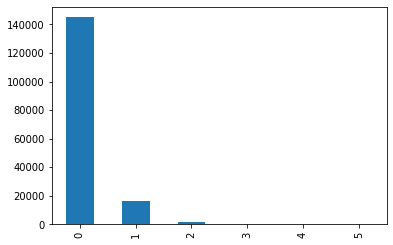

In [ ]:
mtpl["nclaims"].value_counts().plot(kind = "bar")

We now show how to customize our plots. Below we specify the KU Leuven blue-green-ish for further use in our graphs.

In [ ]:
KULbg =  "#116E8A"

In [ ]:
emp_freq = mtpl.groupby("nclaims").agg(tot_obs = ('nclaims', 'count'), tot_expo = ('expo', 'sum'))
emp_freq

,tot_obs,tot_expo
nclaims,,
0,144936,128256.276712
1,16556,15366.750685
2,1558,1443.301370
3,162,150.454795
4,17,14.328767
5,2,1.375342


Mind the difference between the above structure of `emp_freq` and the one below:

In [ ]:
emp_freq.reset_index(inplace = True)
emp_freq

,nclaims,tot_obs,tot_expo
0,0,144936,128256.276712
1,1,16556,15366.750685
2,2,1558,1443.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


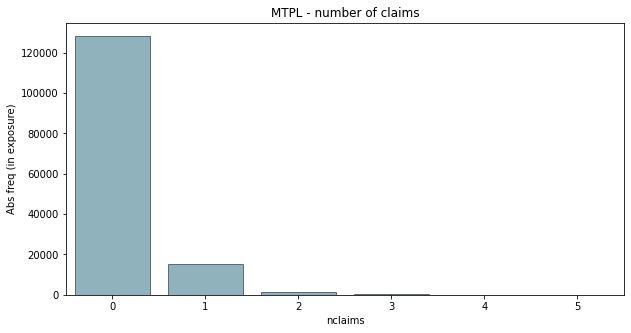

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data = emp_freq, x = "nclaims", y = "tot_expo", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('MTPL - number of claims')
plt.show()

Next to `nclaims`, we also explore the distribution of `avg`, the severity paid per reported claim.

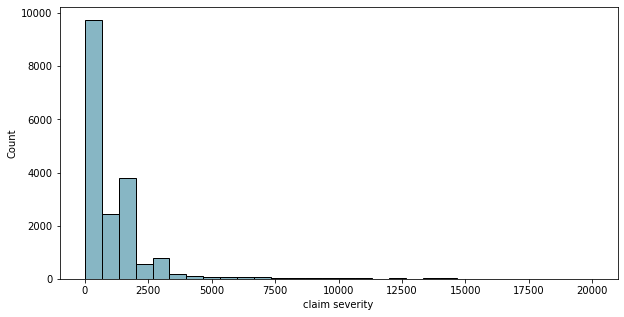

In [ ]:
plt.figure(figsize=(10,5));
sns.histplot(data=mtpl, x= "avg", color=KULbg, alpha=0.5, bins=30, binrange=[0,20000])
plt.xlabel("claim severity")
plt.show() 

With similar instructions we can inspect the distribution of `Sale_Price` in the Ames housing data set.

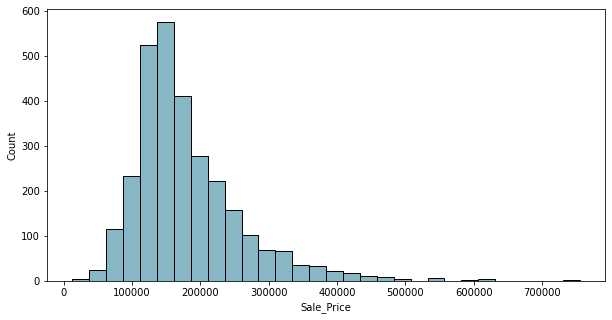

In [ ]:
plt.figure(figsize=(10,5));
sns.histplot(data = ames_orig, x = "Sale_Price", color = KULbg, alpha = 0.5, bins = 30)
plt.xlabel("Sale_Price")
plt.show() 

In [ ]:
ames_orig["log_Sale_Price"] = np.log(ames_orig["Sale_Price"])

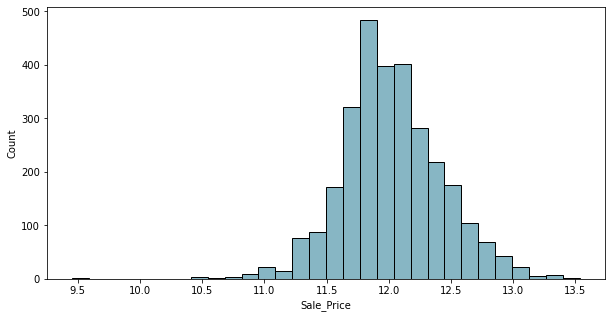

In [ ]:
plt.figure(figsize=(10,5));
sns.histplot(data = ames_orig, x = "log_Sale_Price", color = KULbg, alpha = 0.5, bins = 30)
plt.xlabel("Sale_Price")
plt.show() 

### 2.2.2 Visualizing the distribution of the features paying attention to risk factors of different types

#### Changing the type of a variable

We first inspect the type of each column in the `mtpl` data frame. What is the data type of `coverage` for instance?

In [ ]:
mtpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163231 entries, 0 to 163230
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        163231 non-null  int64  
 1   nclaims   163231 non-null  int64  
 2   amount    163231 non-null  float64
 3   avg       18295 non-null   float64
 4   expo      163231 non-null  float64
 5   coverage  163231 non-null  object 
 6   fuel      163231 non-null  object 
 7   use       163231 non-null  object 
 8   fleet     163231 non-null  object 
 9   sex       163231 non-null  object 
 10  ageph     163231 non-null  int64  
 11  bm        163231 non-null  int64  
 12  agec      163231 non-null  int64  
 13  power     163231 non-null  int64  
 14  pc        163231 non-null  int64  
 15  town      163231 non-null  object 
 16  long      163231 non-null  float64
 17  lat       163231 non-null  float64
dtypes: float64(5), int64(7), object(6)
memory usage: 22.4+ MB


In [ ]:
mtpl.coverage

0         TPL
1          PO
2         TPL
3         TPL
4         TPL
         ... 
163226    TPL
163227    TPL
163228    TPL
163229    TPL
163230     FO
Name: coverage, Length: 163231, dtype: object

We transform the variables `coverage`, `fuel`, `use`, `fleet` and `sex` to type categorical for further use in data exploration and the predictive modeling steps. 


In [ ]:
for c in ["coverage", "fuel", "use", "fleet", "sex"]:
    mtpl[c]=pd.Categorical(mtpl[c])    

In [ ]:
mtpl.coverage

0         TPL
1          PO
2         TPL
3         TPL
4         TPL
         ... 
163226    TPL
163227    TPL
163228    TPL
163229    TPL
163230     FO
Name: coverage, Length: 163231, dtype: category
Categories (3, object): ['FO', 'PO', 'TPL']

In [ ]:
mtpl.town

0          BRUSSEL
1          BRUSSEL
2          BRUSSEL
3          BRUSSEL
4          BRUSSEL
            ...   
163226    MALDEGEM
163227    MALDEGEM
163228    MALDEGEM
163229    MALDEGEM
163230    MALDEGEM
Name: town, Length: 163231, dtype: object

In [ ]:
mtpl["town"] = mtpl["town"].astype("string")

In [ ]:
mtpl.town

0          BRUSSEL
1          BRUSSEL
2          BRUSSEL
3          BRUSSEL
4          BRUSSEL
            ...   
163226    MALDEGEM
163227    MALDEGEM
163228    MALDEGEM
163229    MALDEGEM
163230    MALDEGEM
Name: town, Length: 163231, dtype: string

In [ ]:
mtpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163231 entries, 0 to 163230
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        163231 non-null  int64   
 1   nclaims   163231 non-null  int64   
 2   amount    163231 non-null  float64 
 3   avg       18295 non-null   float64 
 4   expo      163231 non-null  float64 
 5   coverage  163231 non-null  category
 6   fuel      163231 non-null  category
 7   use       163231 non-null  category
 8   fleet     163231 non-null  category
 9   sex       163231 non-null  category
 10  ageph     163231 non-null  int64   
 11  bm        163231 non-null  int64   
 12  agec      163231 non-null  int64   
 13  power     163231 non-null  int64   
 14  pc        163231 non-null  int64   
 15  town      163231 non-null  string  
 16  long      163231 non-null  float64 
 17  lat       163231 non-null  float64 
dtypes: category(5), float64(5), int64(7), string(1)
memory usage: 17

#### A type-specific exploratory analysis of the risk factors

##### Exploring a factor variable

In [ ]:
mtpl["sex"].value_counts()

male      120056
female     43175
Name: sex, dtype: int64

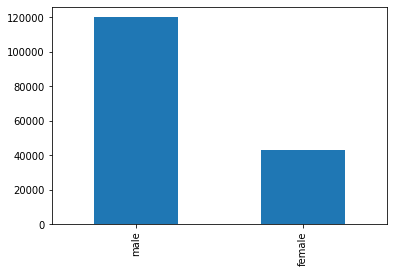

In [ ]:
mtpl["sex"].value_counts().plot(kind = "bar")

In [ ]:
mtpl.groupby("sex").agg({'nclaims':sum}).values / mtpl.groupby("sex").agg({'expo':sum}).values

array([[0.14843248],
       [0.13611639]])

In [ ]:
mtpl.groupby("sex")["nclaims"].sum() / mtpl.groupby("sex")["expo"].sum()

sex
female    0.148432
male      0.136116
dtype: float64

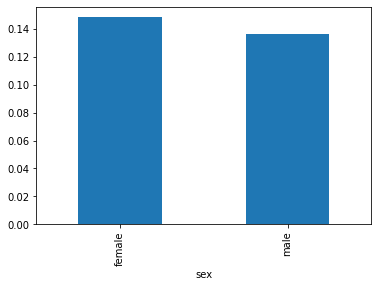

In [ ]:
(mtpl.groupby("sex")["nclaims"].sum() / mtpl.groupby("sex")["expo"].sum()).plot(kind = "bar");

#### Exploring a continuous variable

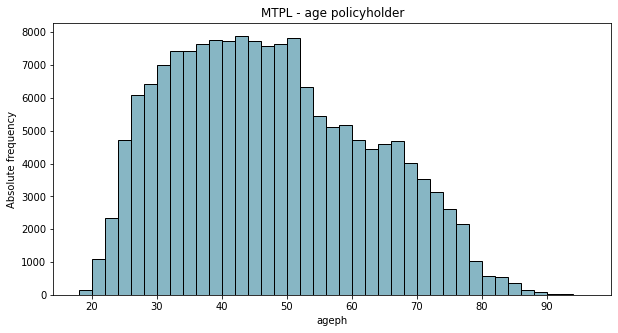

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(data = mtpl, x = "ageph", color = KULbg, binwidth = 2, alpha = 0.5)
plt.ylabel("Absolute frequency")
plt.title('MTPL - age policyholder')
plt.show()

### 2.2.3 Visualizing the empirical distribution of the target as a function of one of the features: a marginal analysis 

In [ ]:
freq_by_age = mtpl.groupby("ageph").agg(tot_claims = ('nclaims', 'sum'), tot_expo = ('expo', 'sum'))
freq_by_age.head()

,tot_claims,tot_expo
ageph,,
18,5,4.621918
19,28,93.021918
20,113,342.284932
21,165,597.389041
22,202,778.827397


In [ ]:
freq_by_age.reset_index(inplace = True)
freq_by_age["emp_freq"] = freq_by_age["tot_claims"] / freq_by_age["tot_expo"]
freq_by_age.head()

,ageph,tot_claims,tot_expo,emp_freq
0,18,5,4.621918,1.081802
1,19,28,93.021918,0.301004
2,20,113,342.284932,0.330134
3,21,165,597.389041,0.276202
4,22,202,778.827397,0.259364


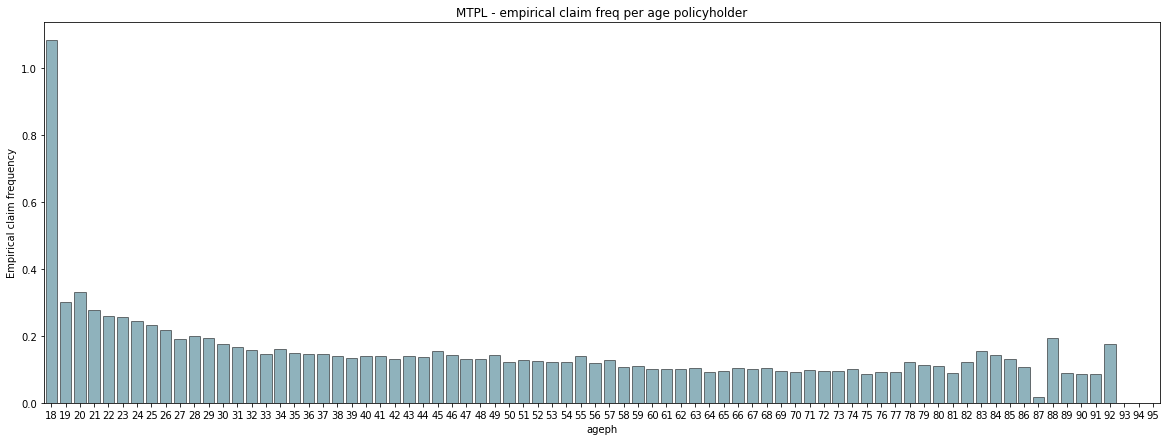

In [ ]:
plt.figure(figsize = (20, 7))
sns.barplot(data = freq_by_age, x = "ageph", y = "emp_freq", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Empirical claim frequency")
plt.title('MTPL - empirical claim freq per age policyholder')
plt.show()

In [ ]:
freq_by_bm = mtpl.groupby("bm").agg(tot_claims = ('nclaims', 'sum'), tot_expo = ('expo', 'sum'))
freq_by_bm.reset_index(inplace = True)
freq_by_bm["emp_freq"] = freq_by_bm["tot_claims"] / freq_by_bm["tot_expo"]
freq_by_bm.head()

,bm,tot_claims,tot_expo,emp_freq
0,0,5597,55621.613699,0.100626
1,1,2894,24860.400000,0.116410
2,2,1110,8666.923288,0.128073
3,3,581,3286.476712,0.176785
4,4,1071,7257.002740,0.147582


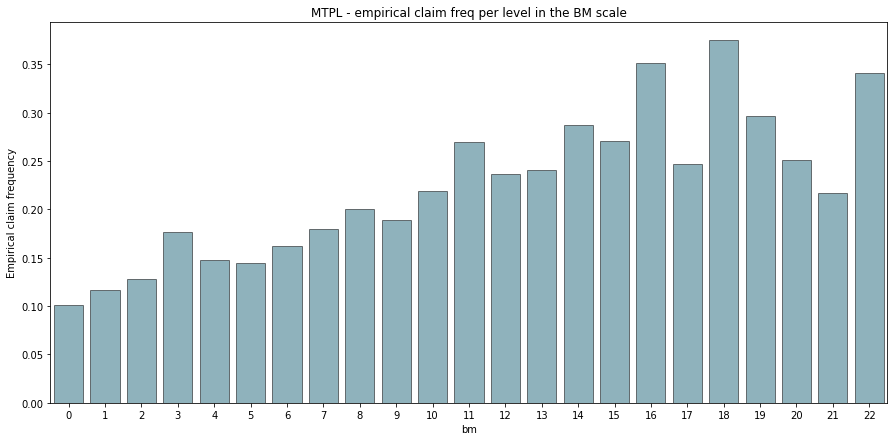

In [ ]:
plt.figure(figsize = (15, 7))
sns.barplot(data = freq_by_bm, x = "bm", y = "emp_freq", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Empirical claim frequency")
plt.title('MTPL - empirical claim freq per level in the BM scale')
plt.show()

# 3. More on fitting GLMs with {statsmodels} and the {statsmodels.formula.api} <a name="three"></a>

## 3.1 A frequency and severity GLM with only a factor variable <a name="three-one"></a>

### 3.1.1 Frequency GLM

We first calibrate the following GLM

$$N_i \sim \text{POI}(\mu_i)$$

where $$\mu_i = d_i \exp{(\beta_0 + \beta_1 \mathbb{I}(male_i))}$$
and $d_i$ is the exposure for record $i$.

In [ ]:
freq_glm_sex = smf.glm(formula='nclaims ~ sex',
                       data= mtpl, exposure = mtpl.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_sex.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163231
Model:                            GLM   Df Residuals:                   163229
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63823.
Date:                Wed, 09 Mar 2022   Deviance:                       89914.
Time:                        22:40:33   Pearson chi2:                 2.01e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9076      0.013   -143.186      

In [ ]:
print(freq_glm_sex.summary().tables[1])

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9076      0.013   -143.186      0.000      -1.934      -1.882
sex[T.male]    -0.0866      0.016     -5.523      0.000      -0.117      -0.056


The fitted GLM is stored in `freq_glm_sex` and we now use this fitted model to predict the expected claim frequency for a specified risk profile. In the illustrations below we calculate these predictions for a male vs female driver, both with an exposure equal to 1. 

In [ ]:
male_driver = pd.DataFrame({'sex':['male']})
print(male_driver)
print("")
print(f"Predicted annual claim frequency for a male driver: {freq_glm_sex.predict(male_driver)[0]}")

    sex
0  male

Predicted annual claim frequency for a male driver: 0.13611639486276386


In [ ]:
female_driver= pd.DataFrame({'sex':['female']})
print(female_driver)
print("")
print(f"Predicted annual claim frequency for a fermale driver: {freq_glm_sex.predict(female_driver)[0]}")

      sex
0  female

Predicted annual claim frequency for a fermale driver: 0.14843248007929538


Notice how we did not specify the exposure explicitly? In that case, the exposure is set equal to 1 by default. In case we want to specify the exposure explicitly, this can be done via the `exposure` argument in the `predict` function.

In [ ]:
male_driver = pd.DataFrame({'sex':['male']})
print(male_driver)
print("")
print(f"Predicted claim frequency for a male driver with exposure 1: {freq_glm_sex.predict(male_driver, exposure=1)[0]}")
print(f"Predicted claim frequency for a male driver with exposure 0.5: {freq_glm_sex.predict(male_driver, exposure=0.5)[0]}")
print(f"Predicted claim frequency for a male driver with exposure 0.1: {freq_glm_sex.predict(male_driver, exposure=0.1)[0]}")

    sex
0  male

Predicted claim frequency for a male driver with exposure 1: 0.13611639486276386
Predicted claim frequency for a male driver with exposure 0.5: 0.06805819743138194
Predicted claim frequency for a male driver with exposure 0.1: 0.013611639486276392


Let's explore the connection between these predicted expected claim frequencies and the calibrated GLM parameters in the GLM object `freq_glm_sex`. The coefficients can be obtained via the `params` attribute.

In [ ]:
freq_glm_sex.params

Intercept     -1.907625
sex[T.male]   -0.086620
dtype: float64

For the `female_driver` risk profile, we have the calibrated intercept: $$\log{\hat{E}[Y]} = \hat{\beta}_0$$

In [ ]:
np.log(freq_glm_sex.predict(female_driver))

0   -1.907625
dtype: float64

For the `male_driver` risk profile, we have the calibrated intercept plus the `sex` coefficient: $$\log{\hat{E}[Y]} = \hat{\beta}_0 + \hat{\beta}_1$$

In [ ]:
np.log(freq_glm_sex.predict(male_driver))

0   -1.994245
dtype: float64

We now predict the average claim frequency for every observation in the original `mtpl` data set. Once for exposure equal to one and once for the observed exposure in the mtpl data.

In [ ]:
pd.DataFrame({'sex': mtpl.sex, 'expo':mtpl.expo,
              'prediction_expo_one': freq_glm_sex.predict(mtpl),
              'prediction_expo_obs': freq_glm_sex.predict(mtpl, exposure=mtpl.expo)}).drop_duplicates(subset=['expo'])

,sex,expo,prediction_expo_one,prediction_expo_obs
0,male,1.000000,0.136116,0.136116
4,female,0.046575,0.148432,0.006913
7,female,0.402740,0.148432,0.059780
11,male,0.980822,0.136116,0.133506
13,male,0.972603,0.136116,0.132387
...,...,...,...,...
4793,female,0.484932,0.148432,0.071980
5282,male,0.200000,0.136116,0.027223
5446,male,0.441096,0.136116,0.060040
5537,female,0.775342,0.148432,0.115086


Another approach to obtain predictions is via the `fittedvalues.values` attribute. Notice that the `fittedvalues.values` argument of the fitted GLM takes the observed exposure during fitting into account. Hence, dividing the `fittedvalues.values` by the registered `expo` leads to the *yearly* expected claim frequency.   

In [ ]:
pd.DataFrame({'sex': mtpl.sex, 'expo':mtpl.expo,
              'prediction_expo_one': freq_glm_sex.fittedvalues.values / mtpl.expo,
              'prediction_expo_obs': freq_glm_sex.fittedvalues.values}).drop_duplicates(subset=['expo'])

,sex,expo,prediction_expo_one,prediction_expo_obs
0,male,1.000000,0.136116,0.136116
4,female,0.046575,0.148432,0.006913
7,female,0.402740,0.148432,0.059780
11,male,0.980822,0.136116,0.133506
13,male,0.972603,0.136116,0.132387
...,...,...,...,...
4793,female,0.484932,0.148432,0.071980
5282,male,0.200000,0.136116,0.027223
5446,male,0.441096,0.136116,0.060040
5537,female,0.775342,0.148432,0.115086


### 3.1.2 Severity GLM

In [ ]:
sev_glm_sex = smf.glm('avg ~ sex', data = mtpl, family = sm.families.Gamma(link=sm.families.links.log())).fit()
print(sev_glm_sex.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    avg   No. Observations:                18295
Model:                            GLM   Df Residuals:                    18293
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                          83.463
Method:                          IRLS   Log-Likelihood:            -1.9421e+05
Date:                Wed, 09 Mar 2022   Deviance:                       46435.
Time:                        23:06:17   Pearson chi2:                 1.53e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.5730      0.128     59.111      

## 3.2 A GLM with a continuous covariate <a name="three-two"></a>

We continue with the following GLM specification
$$N_i \sim \text{POI}(\mu_i)$$
where 
$$\mu_i = d_i \exp{(\beta_0 + \beta_1 \text{age}_i)},$$
with $d_i$ the exposure of observation $i$ and $\text{age}_i$ the observation's registered age.

In [ ]:
freq_glm_age = smf.glm('nclaims ~ ageph', data = mtpl, exposure = mtpl.expo, family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_age.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163231
Model:                            GLM   Df Residuals:                   163229
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63280.
Date:                Wed, 09 Mar 2022   Deviance:                       88829.
Time:                        23:06:20   Pearson chi2:                 1.98e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2286      0.023    -53.648      0.0

Using the fitted GLM model stored in `freq_glm_age` we now want to predict the yearly expected claim frequency for every possible `age` between the min and max `age` observed in the `mtpl` data set. Hereto, we first create a grid of age values with the `arange(.)` function in {NumPy}.

In [ ]:
age = np.arange(min(mtpl.ageph), max(mtpl.ageph)+1)
age

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

We specify `expo = 1` for each age value stored in the grid. We create a DataFrame `df` with variables `ageph` and `expo`.  

In [ ]:
df = pd.DataFrame({'ageph': age})
df

,ageph
0,18
1,19
2,20
3,21
4,22
...,...
73,91
74,92
75,93
76,94


We are now ready to use the `predict` functionality that comes with the fitted GLM object `freq_glm_age`. We predict the expected claim frequencies for the risk profiles stored in `df`. 

In [ ]:
pred_glm_age = freq_glm_age.predict(df)
pred_glm_age

0     0.218437
1     0.214914
2     0.211449
3     0.208039
4     0.204684
        ...   
73    0.066663
74    0.065588
75    0.064530
76    0.063490
77    0.062466
Length: 78, dtype: float64

In [ ]:
df["pred"] = pred_glm_age
df

,ageph,pred
0,18,0.218437
1,19,0.214914
2,20,0.211449
3,21,0.208039
4,22,0.204684
...,...,...
73,91,0.066663
74,92,0.065588
75,93,0.064530
76,94,0.063490


We visualize the predicted claim frequencies versus age of the policyholder.

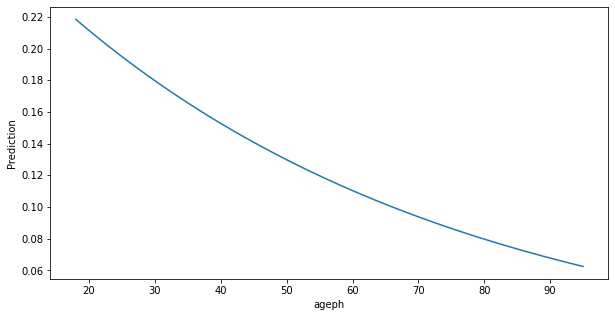

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="ageph", y="pred")
plt.ylabel("Prediction")
plt.show()

## 3.3 A GLM with a binned continuous variable <a name="three-three"></a>

In pricing models we often bin a continuous variable so that a factor variable results. The resulting factor variable can then be used in a GLM. The advantage is that - with these factor variables - the resulting pricing model can be summarized in a tariff table, a table with the expected frequency, the expected severity or the technical premium (i.e. product of expected frequency and expected severity) per risk profile.  

We demonstrate the use of `cut(.)` from the {pandas} library to bin the continuous variable `ageph`. Details about this function are [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

In [ ]:
ageph_cat = pd.cut(mtpl.ageph, bins = 10, include_lowest = True)
ageph_cat

0                       (48.8, 56.5]
1                       (56.5, 64.2]
2                       (56.5, 64.2]
3                       (71.9, 79.6]
4                       (25.7, 33.4]
                     ...            
163226                  (33.4, 41.1]
163227                  (41.1, 48.8]
163228                  (48.8, 56.5]
163229                  (41.1, 48.8]
163230    (17.921999999999997, 25.7]
Name: ageph, Length: 163231, dtype: category
Categories (10, interval[float64, right]): [(17.921999999999997, 25.7] < (25.7, 33.4] < (33.4, 41.1] <
                                            (41.1, 48.8] ... (64.2, 71.9] < (71.9, 79.6] <
                                            (79.6, 87.3] < (87.3, 95.0]]

We add the resulting variable to the `mtpl` DataFrame.

In [ ]:
ageph_cat= ageph_cat.rename("ageph_cat")
mtpl = pd.concat([mtpl, ageph_cat], axis = 1)
mtpl

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat,ageph_cat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386,"(48.8, 56.5]"
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386,"(56.5, 64.2]"
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386,"(56.5, 64.2]"
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386,"(71.9, 79.6]"
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386,"(25.7, 33.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163226,163227,0,0.000000,NaN,1.000000,TPL,diesel,work,N,male,37,5,10,40,9990,MALDEGEM,3.421256,51.199975,"(33.4, 41.1]"
163227,163228,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,44,0,6,55,9990,MALDEGEM,3.421256,51.199975,"(41.1, 48.8]"
163228,163229,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,50,0,10,40,9990,MALDEGEM,3.421256,51.199975,"(48.8, 56.5]"
163229,163230,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,43,0,7,66,9990,MALDEGEM,3.421256,51.199975,"(41.1, 48.8]"


We are now ready to fit a Poisson GLM for `nclaims` with the binned age of the policyholder variable as covariate. We store the fitted GLM as `freq_glm_age_cat`.

In [ ]:
freq_glm_age_cat = smf.glm('nclaims ~ ageph_cat', data=mtpl, exposure=mtpl.expo, family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_age_cat.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163231
Model:                            GLM   Df Residuals:                   163221
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63218.
Date:                Wed, 09 Mar 2022   Deviance:                       88706.
Time:                        23:07:04   Pearson chi2:                 1.96e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

As before, we aim to visualize the fitted age effect. Hereto, we start from the grid of age values stored in `age` and bin these age values using the bins created for `ageph_cat`.   

In [ ]:
age_cat = pd.cut(age, bins = ageph_cat.cat.categories, include_lowest = True)
age_cat

[(17.921999999999997, 25.7], (17.921999999999997, 25.7], (17.921999999999997, 25.7], (17.921999999999997, 25.7], (17.921999999999997, 25.7], ..., (87.3, 95.0], (87.3, 95.0], (87.3, 95.0], (87.3, 95.0], (87.3, 95.0]]
Length: 78
Categories (10, interval[float64, right]): [(17.921999999999997, 25.7] < (25.7, 33.4] < (33.4, 41.1] <
                                            (41.1, 48.8] ... (64.2, 71.9] < (71.9, 79.6] <
                                            (79.6, 87.3] < (87.3, 95.0]]

Next, we calculate the expected yearly claim frequency for each age value in the grid `age` using the GLM stored in `freq_glm_age_cat`. 

In [ ]:
df_cat = pd.DataFrame({'ageph':age, 'ageph_cat': age_cat})
df_cat["pred"] = freq_glm_age_cat.predict(df_cat)
df_cat

,ageph,ageph_cat,pred
0,18,"(17.921999999999997, 25.7]",0.251792
1,19,"(17.921999999999997, 25.7]",0.251792
2,20,"(17.921999999999997, 25.7]",0.251792
3,21,"(17.921999999999997, 25.7]",0.251792
4,22,"(17.921999999999997, 25.7]",0.251792
...,...,...,...
73,91,"(87.3, 95.0]",0.127739
74,92,"(87.3, 95.0]",0.127739
75,93,"(87.3, 95.0]",0.127739
76,94,"(87.3, 95.0]",0.127739


Finally, we visualize the age effect as calibrated with the `freq_glm_age_cat` object. 

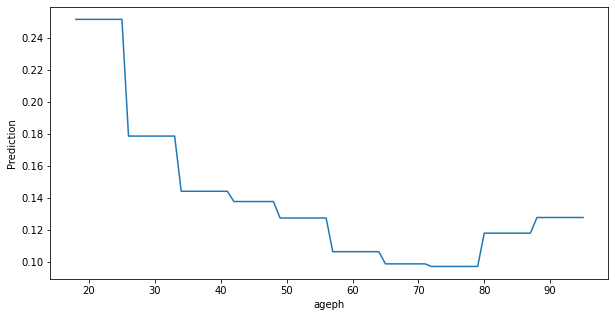

In [ ]:
plt.figure(figsize=(10,5));
sns.lineplot(data = df_cat, x = "ageph", y = "pred")
plt.ylabel("Prediction")
plt.show()

## 3.4 A frequency GLM with mulitple features of various types <a name="three-four"></a>

Building upon our explorations with simple GLMs in Sections 3.1 - 3.3, we are now ready to fit a GLM with multiple features included.  

In [ ]:
freq_glm_cont = smf.glm('nclaims ~ coverage + fuel + use + fleet + sex + ageph + bm + power + agec', data = mtpl, exposure = mtpl.expo, family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_cont.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163231
Model:                            GLM   Df Residuals:                   163220
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62541.
Date:                Wed, 09 Mar 2022   Deviance:                       87350.
Time:                        23:07:26   Pearson chi2:                 1.91e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9849      0.042  

We bin the continuous variables `age`, `bm` and `power` using some prespecified bins. The paper [A data driven binning strategy for the construction of insurance tariff classes](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3052174) by Henckaerts et al. (2018) outlines a data driven strategy to find a suitable binning of the continuous risk factors.

In [ ]:
mtpl['ageph_cat'] = pd.cut(mtpl.ageph, bins = [18,26,29,33,51,56,61,73,95], right = False, include_lowest = True)
mtpl['bm_cat'] = pd.cut(mtpl.bm, bins = [0,1,2,3,7,9,11,22], right = False, include_lowest = True)
mtpl['power_cat'] = pd.cut(mtpl.power, bins = [10,36,46,75,243], right = False, include_lowest = True)

We fit a Poisson GLM for `nclaims` using multiple covariates, all of type factor. We store the resulting GLM fit in `freq_glm_cat`.

In [ ]:
freq_glm_cat = smf.glm('nclaims ~ coverage + fuel + ageph_cat + bm_cat + power_cat', data = mtpl, exposure = mtpl.expo, family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_cat.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163193
Model:                            GLM   Df Residuals:                   163173
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62470.
Date:                Wed, 09 Mar 2022   Deviance:                       87225.
Time:                        23:07:33   Pearson chi2:                 1.90e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Finally, we demonstrate how to change the reference level of a factor variable, when dummy coding is used.  

In [ ]:
freq_glm_cat_ref = smf.glm('nclaims ~ C(coverage, Treatment(reference="TPL")) + C(fuel, Treatment(reference="gasoline")) + ageph_cat + bm_cat + power_cat', data = mtpl, exposure = mtpl.expo, family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_cat_ref.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163193
Model:                            GLM   Df Residuals:                   163173
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62470.
Date:                Wed, 09 Mar 2022   Deviance:                       87225.
Time:                        23:07:37   Pearson chi2:                 1.90e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
mtpl["pred_cont"] = freq_glm_cont.predict(mtpl)
mtpl["pred_cat"] = freq_glm_cat.predict(mtpl)
mtpl.head(10)

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,...,power,pc,town,long,lat,ageph_cat,bm_cat,power_cat,pred_cont,pred_cat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,...,77,1000,BRUSSEL,4.355223,50.845386,"[33, 51)","[3, 7)","[75, 243)",0.153517,0.174404
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,...,66,1000,BRUSSEL,4.355223,50.845386,"[61, 73)","[3, 7)","[46, 75)",0.126802,0.114068
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,...,70,1000,BRUSSEL,4.355223,50.845386,"[56, 61)","[0, 1)","[46, 75)",0.119941,0.108107
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,...,57,1000,BRUSSEL,4.355223,50.845386,"[73, 95)","[0, 1)","[46, 75)",0.084369,0.091817
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,...,70,1000,BRUSSEL,4.355223,50.845386,"[26, 29)","[9, 11)","[46, 75)",0.233594,0.215858
5,6,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,...,70,1000,BRUSSEL,4.355223,50.845386,"[26, 29)","[11, 22)","[46, 75)",0.262072,0.281827
6,7,1,155.974606,155.974606,1.000000,FO,gasoline,private,N,male,...,55,1000,BRUSSEL,4.355223,50.845386,"[26, 29)","[11, 22)","[46, 75)",0.231076,0.262624
7,8,0,0.000000,NaN,0.402740,TPL,gasoline,private,N,female,...,47,1000,BRUSSEL,4.355223,50.845386,"[56, 61)","[11, 22)","[46, 75)",0.193781,0.217003
8,9,0,0.000000,NaN,1.000000,FO,gasoline,private,N,male,...,98,1000,BRUSSEL,4.355223,50.845386,"[56, 61)","[0, 1)","[75, 243)",0.105906,0.097367
9,10,0,0.000000,NaN,1.000000,PO,gasoline,private,N,male,...,74,1000,BRUSSEL,4.355223,50.845386,"[33, 51)","[7, 9)","[46, 75)",0.180795,0.169360


We quickly scan and compare the predictions obtained with the `freq_glm_cont` GLM on the one hand and the `freq_glm_cat` GLM on the other hand. We calculate the predicted values for every record in the `mtpl` data set.

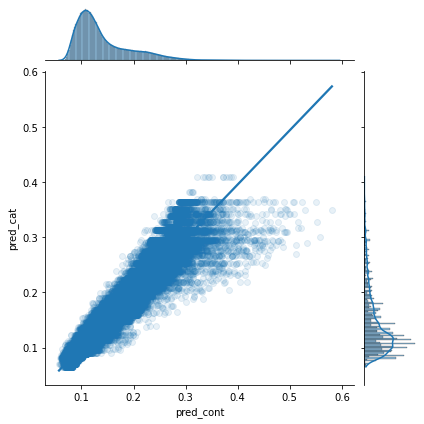

In [ ]:
sns.jointplot(data = mtpl, x = "pred_cont", y = "pred_cat", kind = "reg", joint_kws = {"scatter_kws":dict(alpha=0.1)});

In [ ]:
mtpl = mtpl.drop(['pred_cont', 'pred_cat'], axis=1)
mtpl

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,...,bm,agec,power,pc,town,long,lat,ageph_cat,bm_cat,power_cat
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,...,5,12,77,1000,BRUSSEL,4.355223,50.845386,"[33, 51)","[3, 7)","[75, 243)"
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,...,5,3,66,1000,BRUSSEL,4.355223,50.845386,"[61, 73)","[3, 7)","[46, 75)"
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,...,0,10,70,1000,BRUSSEL,4.355223,50.845386,"[56, 61)","[0, 1)","[46, 75)"
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,...,0,15,57,1000,BRUSSEL,4.355223,50.845386,"[73, 95)","[0, 1)","[46, 75)"
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,...,9,7,70,1000,BRUSSEL,4.355223,50.845386,"[26, 29)","[9, 11)","[46, 75)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163226,163227,0,0.000000,NaN,1.000000,TPL,diesel,work,N,male,...,5,10,40,9990,MALDEGEM,3.421256,51.199975,"[33, 51)","[3, 7)","[36, 46)"
163227,163228,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,...,0,6,55,9990,MALDEGEM,3.421256,51.199975,"[33, 51)","[0, 1)","[46, 75)"
163228,163229,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,...,0,10,40,9990,MALDEGEM,3.421256,51.199975,"[33, 51)","[0, 1)","[36, 46)"
163229,163230,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,...,0,7,66,9990,MALDEGEM,3.421256,51.199975,"[33, 51)","[0, 1)","[46, 75)"


# 4. Regularized (G)LMs with {statsmodels} and {scikit-learn} <a name="four"></a>

## 4.1 A regularized Poisson model with {statsmodels} <a name="four-one"></a>



{statsmodels} and {statsmodels.formula.api} allow to fit GLMs with an elastic net penalty. The following penalized loss function is then minimized:
$$-\frac{1}{n}\log \mathcal{L}(\beta_0,\mathbf{\beta}; \mathbf{X},y) + \alpha \cdot \left( \lambda ||\mathbf{\beta}||_1 + \frac{1-\lambda}{2}||\mathbf{\beta}||_2^2 \right),$$
where $\alpha$ is the penalty weight and $\lambda$ determines the weight of the $\ell_1$ versus $\ell_2$ norm. More details are [here](https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.fit_regularized.html).


The code below then fits a first example of a Poisson GLM for `nclaims` with a lasso penalty.

When using factor variables with more than two levels in a regularized regression model, it is recommended to use one-hot encoding. As such, one let's the model freely decide which levels should be grouped.

In [ ]:
cov_dum = pd.get_dummies(mtpl.coverage)
mtpl = pd.concat([mtpl, cov_dum], axis = 1)
mtpl

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat,FO,PO,TPL
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386,0,0,1
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386,0,1,0
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386,0,0,1
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386,0,0,1
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163226,163227,0,0.000000,NaN,1.000000,TPL,diesel,work,N,male,37,5,10,40,9990,MALDEGEM,3.421256,51.199975,0,0,1
163227,163228,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,44,0,6,55,9990,MALDEGEM,3.421256,51.199975,0,0,1
163228,163229,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,50,0,10,40,9990,MALDEGEM,3.421256,51.199975,0,0,1
163229,163230,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,43,0,7,66,9990,MALDEGEM,3.421256,51.199975,0,0,1


Moreover, continuous features should be standardized before including them in the regularized model fit.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['ageph', 'bm', 'power', 'agec']

# create and fit scaler
scaler = StandardScaler()
scaler.fit(mtpl[cols_to_scale])

# scale selected data
mtpl[['ageph_stand', 'bm_stand', 'power_stand', 'agec_stand']] = scaler.transform(mtpl[cols_to_scale])

In [ ]:
mtpl.ageph_stand.mean()

2.8317979064550964e-14

In [ ]:
mtpl.ageph_stand.var()

1.0000061263251194

In [ ]:
mtpl

,id,nclaims,amount,avg,expo,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat,FO,PO,TPL,ageph_stand,bm_stand,power_stand,agec_stand
0,1,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386,0,0,1,0.202275,0.432961,1.103569,1.099515
1,2,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386,0,1,0,1.146223,0.432961,0.525400,-1.040085
2,3,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386,0,0,1,0.876524,-0.817457,0.735643,0.624048
3,4,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386,0,0,1,2.022746,-0.817457,0.052353,1.812715
4,5,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386,0,0,1,-1.281072,1.433295,0.735643,-0.089152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163226,163227,0,0.000000,NaN,1.000000,TPL,diesel,work,N,male,37,5,10,40,9990,MALDEGEM,3.421256,51.199975,0,0,1,-0.674248,0.432961,-0.841181,0.624048
163227,163228,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,44,0,6,55,9990,MALDEGEM,3.421256,51.199975,0,0,1,-0.202274,-0.817457,-0.052769,-0.326885
163228,163229,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,50,0,10,40,9990,MALDEGEM,3.421256,51.199975,0,0,1,0.202275,-0.817457,-0.841181,0.624048
163229,163230,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,43,0,7,66,9990,MALDEGEM,3.421256,51.199975,0,0,1,-0.269699,-0.817457,0.525400,-0.089152


In [ ]:
freq_glm_reg = smf.glm('nclaims ~ FO + PO + TPL + fuel + sex + fleet + use + ageph_stand + bm_stand + power_stand + agec_stand',
                       data=mtpl, exposure=mtpl.expo, family=sm.families.Poisson(link=sm.families.links.log())).fit_regularized(method='elastic_net', alpha = 0.001, L1_wt = 1)

In [ ]:
freq_glm_reg.params

Intercept          -1.734316
fuel[T.gasoline]   -0.152563
sex[T.male]        -0.011243
fleet[T.Y]          0.000000
use[T.work]         0.000000
FO                 -0.146410
PO                 -0.181308
TPL                -0.121419
ageph_stand        -0.105356
bm_stand            0.246020
power_stand         0.056871
agec_stand          0.000000
dtype: float64

We now explore the effect of the penalty weight $\alpha$:

In [ ]:
alpha_grid = [0.1, 0.01, 0.001, 0.0001]
coef_list = []
for alpha in alpha_grid:
  print(f"Busy with alpha:{alpha}")
  glm_reg_fit = smf.glm('nclaims ~ FO + PO + TPL + fuel + sex + fleet + use + ageph_stand + bm_stand + power_stand + agec_stand',
                        data=mtpl, exposure=mtpl.expo, family=sm.families.Poisson(link=sm.families.links.log())).fit_regularized(method='elastic_net', alpha = alpha, L1_wt = 1)
  coef_list.append(glm_reg_fit.params)                      
pd_coef = pd.concat(coef_list, axis = 1)

Busy with alpha:0.1
Busy with alpha:0.01
Busy with alpha:0.001
Busy with alpha:0.0001


In [ ]:
pd_coef.columns = alpha_grid
pd_coef

,0.1000,0.0100,0.0010,0.0001
Intercept,-1.379406,-1.880800,-1.734316,-1.051341
fuel[T.gasoline],0.000000,-0.046446,-0.152563,-0.171113
sex[T.male],0.000000,0.000000,-0.011243,-0.023756
fleet[T.Y],0.000000,0.000000,0.000000,-0.095842
use[T.work],0.000000,0.000000,0.000000,-0.070467
FO,0.000000,0.000000,-0.146410,-0.857882
PO,0.000000,0.000000,-0.181308,-0.865909
TPL,0.000000,0.000000,-0.121419,-0.793738
ageph_stand,0.000000,-0.056469,-0.105356,-0.110007
bm_stand,0.000000,0.196946,0.246020,0.254448


## 4.2 A regularized linear regression model with {scikit-learn} <a name="four-two"></a>


We demonstrate the use of regularized regression within {scikit-learn} on the Ames housing data set.

In [ ]:
ames_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2930 non-null   int64  
 1   MS_SubClass         2930 non-null   object 
 2   MS_Zoning           2930 non-null   object 
 3   Lot_Frontage        2930 non-null   int64  
 4   Lot_Area            2930 non-null   int64  
 5   Street              2930 non-null   object 
 6   Alley               2930 non-null   object 
 7   Lot_Shape           2930 non-null   object 
 8   Land_Contour        2930 non-null   object 
 9   Utilities           2930 non-null   object 
 10  Lot_Config          2930 non-null   object 
 11  Land_Slope          2930 non-null   object 
 12  Neighborhood        2930 non-null   object 
 13  Condition_1         2930 non-null   object 
 14  Condition_2         2930 non-null   object 
 15  Bldg_Type           2930 non-null   object 
 16  House_

In the below demonstration of ridge and lasso linear regression, we focus on the numeric features in the Ames housing data set.

### Some data preperation steps

In [ ]:
ames_num = ames_orig[ames_orig.columns[ames_orig.dtypes != 'object'].values].drop(columns = ['Unnamed: 0'])

In [ ]:
ames_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lot_Frontage        2930 non-null   int64  
 1   Lot_Area            2930 non-null   int64  
 2   Year_Built          2930 non-null   int64  
 3   Year_Remod_Add      2930 non-null   int64  
 4   Mas_Vnr_Area        2930 non-null   int64  
 5   BsmtFin_SF_1        2930 non-null   int64  
 6   BsmtFin_SF_2        2930 non-null   int64  
 7   Bsmt_Unf_SF         2930 non-null   int64  
 8   Total_Bsmt_SF       2930 non-null   int64  
 9   First_Flr_SF        2930 non-null   int64  
 10  Second_Flr_SF       2930 non-null   int64  
 11  Low_Qual_Fin_SF     2930 non-null   int64  
 12  Gr_Liv_Area         2930 non-null   int64  
 13  Bsmt_Full_Bath      2930 non-null   int64  
 14  Bsmt_Half_Bath      2930 non-null   int64  
 15  Full_Bath           2930 non-null   int64  
 16  Half_B

Recall our earlier explorations of the empirical distribution of the target variable `Sale_Price`: a log transformation helps to obtain a more symmetric distribution of the outcome.

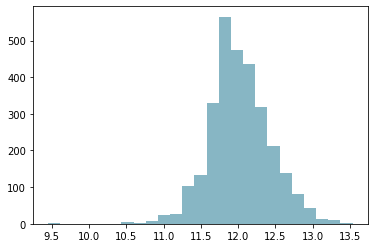

In [ ]:
plt.hist(np.log(ames_num["Sale_Price"]), bins = 25, color = KULbg, alpha = 0.5);

We store the outcome variable (log-transformed) in `ames_y` and the input features in `ames_X`. Note: make sure the target variables (and its log transformation, if attached to `ames_orig`, are droppped when creating `ames_X`.

In [ ]:
ames_X = ames_num.drop(columns = ["Sale_Price", "log_Sale_Price"])
print(ames_X.shape)
ames_y = np.log(ames_num["Sale_Price"])
print(ames_y.shape)

(2930, 34)
(2930,)


We divide the data into a test and train data set.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(ames_X, ames_y, test_size = 0.3, stratify=pd.cut(ames_y,
                                                                                                  bins=np.linspace(ames_y.min(),ames_y.max(), 20),
                                                                                                  include_lowest=True))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2051, 34)
(879, 34)
(2051,)
(879,)


It is preferred to fit regularized regression models with covariates on the same scale. Hence, we fit the standardization constants on `X_train`, then apply these to transform both `X_train` and `X_test`. 

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Fitting a linear regression model without regularization

We are now ready to fit a linear regression on `y_train`, using the standardized input features stored in `Z_train`.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_mod = LinearRegression()
linear_mod.fit(Z_train, y_train)

LinearRegression()

In [ ]:
linear_mod.coef_

array([ 8.38308970e-03,  1.34486917e-02,  8.04262424e-02,  7.25796044e-02,
        5.30797022e-03, -9.76726692e-03, -7.98213019e-03, -2.49245102e-02,
        8.90594150e-02,  2.34697106e+11,  2.64533163e+11,  3.11281587e+10,
       -3.03103871e+11,  1.52191989e-02,  3.79413020e-03,  1.63078667e-03,
        9.03729210e-04, -1.35240708e-02, -3.34739015e-02,  1.68811378e-02,
        3.57522662e-02,  3.83750248e-02,  1.86263173e-02,  1.05146180e-02,
        3.15938113e-03,  1.22665112e-02,  5.10040886e-03,  1.68387422e-02,
        2.64555512e-03,  7.12939747e-04, -1.21675894e-03, -7.44076520e-03,
       -7.26653149e-03,  1.64966551e-02])

### Fitting a ridge regression model with $\ell_2$ penalty on the regression parameters

In [ ]:
from sklearn.linear_model import Ridge

ridge_mod = Ridge(alpha = 0.5)
ridge_mod.fit(Z_train, y_train)

Ridge(alpha=0.5)

In [ ]:
ridge_mod.coef_

array([ 0.00839395,  0.01345917,  0.0802534 ,  0.0726799 ,  0.00538742,
       -0.00960101, -0.00795109, -0.02507334,  0.08925471,  0.05147609,
        0.05259252, -0.00306853,  0.08544344,  0.01518647,  0.00379526,
        0.00166574,  0.00093061, -0.01352603, -0.03343094,  0.01683816,
        0.03574877,  0.03829791,  0.01875171,  0.01060281,  0.00311549,
        0.01217881,  0.00496443,  0.01689928,  0.00258425,  0.00078075,
       -0.00126068, -0.00748691, -0.00731424,  0.01646989])

### Fitting a lasso regression model with $\ell_1$ penalty on the regression parameters

In [ ]:
from sklearn.linear_model import Lasso

lasso_mod = Lasso(alpha = 0.05)
lasso_mod.fit(Z_train, y_train)

Lasso(alpha=0.05)

In [ ]:
lasso_mod.coef_

array([ 0.        ,  0.        ,  0.07432199,  0.05354481,  0.        ,
       -0.        ,  0.        , -0.        ,  0.07550545,  0.        ,
        0.        , -0.        ,  0.12607049,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.02855751,  0.03544708,  0.02498048,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ])

In [ ]:
pd.DataFrame({"Variables" : X_train.columns, "Linear coef":linear_mod.coef_, "Ridge coef":ridge_mod.coef_, "Lasso coef":lasso_mod.coef_})

,Variables,Linear coef,Ridge coef,Lasso coef
0,Lot_Frontage,8.383090e-03,0.008394,0.000000
1,Lot_Area,1.344869e-02,0.013459,0.000000
2,Year_Built,8.042624e-02,0.080253,0.074322
3,Year_Remod_Add,7.257960e-02,0.072680,0.053545
4,Mas_Vnr_Area,5.307970e-03,0.005387,0.000000
5,BsmtFin_SF_1,-9.767267e-03,-0.009601,-0.000000
6,BsmtFin_SF_2,-7.982130e-03,-0.007951,0.000000
7,Bsmt_Unf_SF,-2.492451e-02,-0.025073,-0.000000
8,Total_Bsmt_SF,8.905941e-02,0.089255,0.075505
9,First_Flr_SF,2.346971e+11,0.051476,0.000000


### Choosing the lasso penalty weight via 5-fold cross validation

In [ ]:
from sklearn.linear_model import LassoCV

cv_lasso = LassoCV(cv = 5, random_state = 0)
cv_lasso.fit(Z_train, y_train)

LassoCV(cv=5, random_state=0)

In [ ]:
cv_lasso.alphas_

array([0.2841934 , 0.26503971, 0.24717692, 0.23051803, 0.21498188,
       0.20049282, 0.18698028, 0.17437843, 0.16262591, 0.15166547,
       0.14144372, 0.13191089, 0.12302054, 0.11472936, 0.10699699,
       0.09978575, 0.09306052, 0.08678856, 0.0809393 , 0.07548426,
       0.07039687, 0.06565236, 0.06122761, 0.05710108, 0.05325265,
       0.0496636 , 0.04631644, 0.04319487, 0.04028368, 0.03756869,
       0.03503669, 0.03267533, 0.03047313, 0.02841934, 0.02650397,
       0.02471769, 0.0230518 , 0.02149819, 0.02004928, 0.01869803,
       0.01743784, 0.01626259, 0.01516655, 0.01414437, 0.01319109,
       0.01230205, 0.01147294, 0.0106997 , 0.00997858, 0.00930605,
       0.00867886, 0.00809393, 0.00754843, 0.00703969, 0.00656524,
       0.00612276, 0.00571011, 0.00532527, 0.00496636, 0.00463164,
       0.00431949, 0.00402837, 0.00375687, 0.00350367, 0.00326753,
       0.00304731, 0.00284193, 0.0026504 , 0.00247177, 0.00230518,
       0.00214982, 0.00200493, 0.0018698 , 0.00174378, 0.00162

In [ ]:
cv_lasso.mse_path_

array([[0.18847251, 0.14926135, 0.15705167, 0.16771166, 0.15834104],
       [0.18449561, 0.13832179, 0.14552445, 0.15622855, 0.14534767],
       [0.17014372, 0.12787384, 0.13510747, 0.14341177, 0.13361788],
       [0.15529359, 0.11771937, 0.12565054, 0.13230883, 0.1224692 ],
       [0.14031595, 0.1077164 , 0.11492669, 0.11989363, 0.1110924 ],
       [0.12672922, 0.09805641, 0.10507512, 0.10864835, 0.10124476],
       [0.11489216, 0.08964039, 0.09651313, 0.09886641, 0.09276192],
       [0.10455489, 0.08230711, 0.08905463, 0.09035732, 0.0853996 ],
       [0.09523822, 0.07577787, 0.08237558, 0.0829555 , 0.07882123],
       [0.08696526, 0.0697878 , 0.07632744, 0.07614125, 0.07315944],
       [0.07974182, 0.06457248, 0.07105292, 0.07011996, 0.06829113],
       [0.07343288, 0.06003111, 0.06645217, 0.06487764, 0.06410918],
       [0.06792132, 0.05607628, 0.06243838, 0.06031303, 0.06049378],
       [0.06310471, 0.05263238, 0.05893587, 0.0563382 , 0.05738795],
       [0.05888128, 0.04963226, 0.

In [ ]:
cv_lasso.alpha_

0.002004928226953307

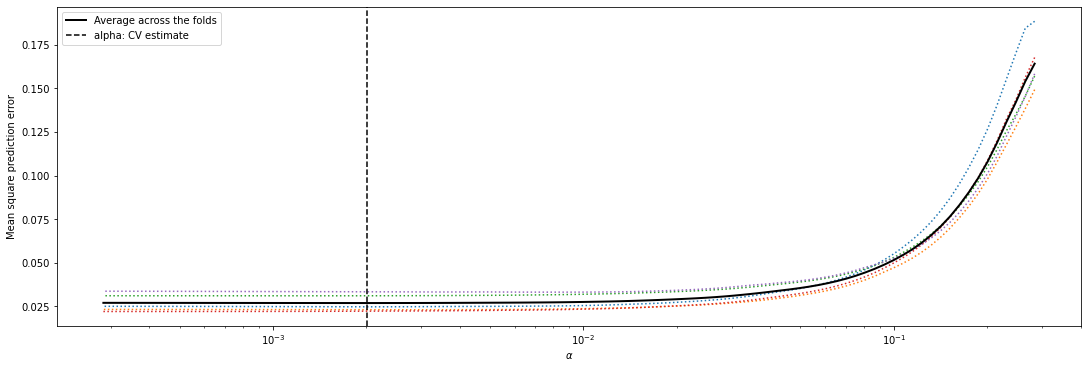

In [ ]:
plt.figure(figsize=(15, 5), constrained_layout=True)
plt.semilogx(cv_lasso.alphas_, cv_lasso.mse_path_, ':')
plt.semilogx(cv_lasso.alphas_, cv_lasso.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(cv_lasso.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square prediction error')
plt.show(block=False)

In [ ]:
lasso_mod_opt = Lasso(alpha = cv_lasso.alpha_)
lasso_mod_opt.fit(Z_train, y_train)
lasso_mod_opt.coef_

array([ 0.00670432,  0.01222762,  0.08051588,  0.07291683,  0.00542598,
       -0.01037756, -0.00409446, -0.02036779,  0.08659128,  0.00481304,
        0.        , -0.00722544,  0.14867666,  0.01512745,  0.00116297,
        0.        ,  0.        , -0.00771658, -0.03155331,  0.00926049,
        0.03661874,  0.03843929,  0.01987548,  0.00948094,  0.00201546,
        0.00880455,  0.00290651,  0.01499061,  0.00121095,  0.        ,
       -0.        , -0.00537253, -0.0052102 ,  0.0147099 ])

As a final step, we compare the predictive performance on the test data, using the four calibrated models.

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_data, y_data):
  y_pred = model.predict(X_data)
  return(mean_squared_error(y_data, y_pred))

In [ ]:
print("Evaluation on train data")
print(f"Linear model:{evaluate_model(linear_mod, Z_train, y_train)}")
print(f"Ridge model:{evaluate_model(ridge_mod, Z_train, y_train)}")
print(f"Lasso model:{evaluate_model(lasso_mod, Z_train, y_train)}")
print(f"Lasso CV model:{evaluate_model(cv_lasso, Z_train, y_train)}")

Evaluation on train data
Linear model:0.025398084768133444
Ridge model:0.025397583894428657
Lasso model:0.034845067638001034
Lasso CV model:0.025493044412036512


In [ ]:
print("Evaluation on test data")
print(f"Linear model:{evaluate_model(linear_mod, Z_test, y_test)}")
print(f"Ridge model:{evaluate_model(ridge_mod, Z_test, y_test)}")
print(f"Lasso model:{evaluate_model(lasso_mod, Z_test, y_test)}")
print(f"Lasso CV model:{evaluate_model(cv_lasso, Z_test, y_test)}")

Evaluation on test data
Linear model:0.04341410550829232
Ridge model:0.04343170479086888
Lasso model:0.04423549395902095
Lasso CV model:0.042358204247832466


## 4.3 Avoiding data leakage with pipelines <a name="four-three"></a>

**Data leakage** arises when you use **information from the test data in the pre-processing stages of the train data**. For example, when standardizing the data, the mean and standard deviation should be calculated on only the training data and exclude the test data. These numbers are then used to standardize both the train and test data.

This process can become very complex to track in the situation of cross-validation, as the pre-processing constants can only be calculated on the folds in the training set without including those from the validation set (which changes over the different folds).

**Pipelines** allow for an efficient implementation to avoid data leakage. The pipeline automatically tracks which parts of the data to use to calculate pre-processing constants and applies these to the correct subsets. Below we show the creation of such a pipeline which consists of a standard scaler and a Lasso model. Passing the pipeline in the cross-validation call makes sure that we tune the optimal parameters without allowing data leakage. When making predictions, we pass the raw (non-standardized) data for input as the scaler is now automatically included in the prediction pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lasso_pipe = Pipeline([('scaler', StandardScaler()),
                       ('lasso',  Lasso(random_state = 0))])

grid_search = GridSearchCV(lasso_pipe, param_grid={'lasso__alpha':cv_lasso.alphas_},
                           scoring="neg_mean_squared_error", cv=5, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=0,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecate...
       0.00151665, 0.00141444, 0.00131911, 0.00123021, 0.00114729,
       0.0

In [ ]:
lasso_optimal = grid_search.best_estimator_
lasso_optimal.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.001869802774717294, copy_X=True,
                       fit_intercept=True, max_iter=1000, normalize=False,
                       positive=False, precompute=False, random_state=0,
                       selection='cyclic', tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
lasso_optimal.predict(X_train)

array([12.24757338, 11.56369694, 11.63604805, ..., 12.48905004,
       11.53052714, 12.08461632])

In [ ]:
print(f"Train performance: {evaluate_model(lasso_optimal, X_train, y_train)}")
print(f"Test performance: {evaluate_model(lasso_optimal, X_test, y_test)}")

Train performance: 0.025481016653219776
Test performance: 0.04241689962456226
